In [1]:
from google.colab import files
data_to_load=files.upload()

Saving Telecom_Churn.csv to Telecom_Churn.csv


In [115]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import  pie, axis, show
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Telecom_Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [116]:
df=df.drop(["customerID"],axis=1)

In [117]:
df.info()# 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [118]:
df.isnull().sum()#To Check null Value 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [119]:
   df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [120]:
  #Data Manipulation
a=df[('gender')].value_counts()
a

Male      3555
Female    3488
Name: gender, dtype: int64

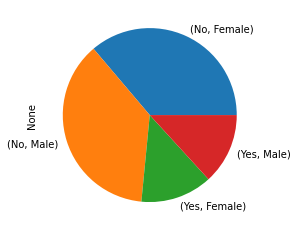

In [121]:
a=df.groupby(by=["Churn","gender"]).size().plot(kind='pie')

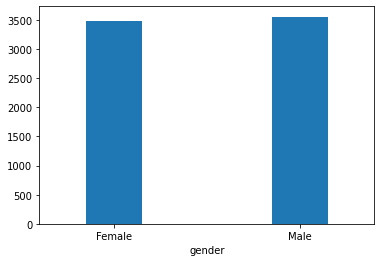

In [122]:
df.Churn.groupby(df.gender).count().plot(kind='bar',rot = 0, width = 0.3)
#plt.axis('equal')
#plt.show()

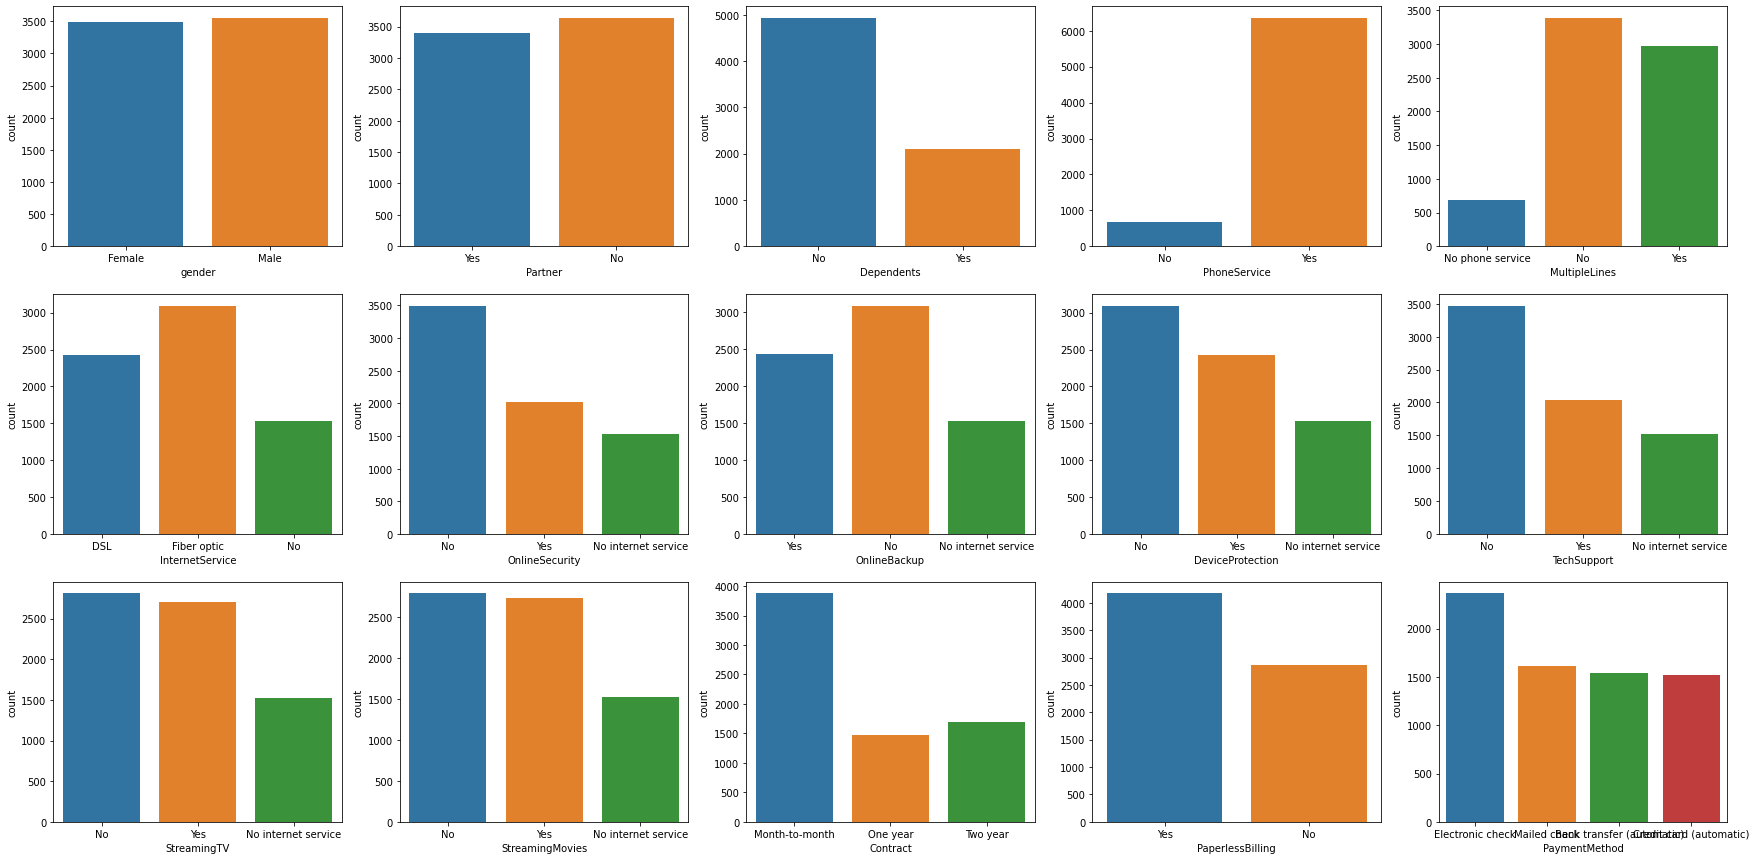

In [123]:
fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (30,15))
sns.countplot(x = "gender",data = df, ax=axes[0][0])
sns.countplot(x = "Partner", data = df, ax=axes[0][1])
sns.countplot(x = "Dependents", data = df, ax=axes[0][2])
sns.countplot(x = "PhoneService", data = df, ax=axes[0][3])
sns.countplot(x = "MultipleLines", data = df, ax=axes[0][4])
sns.countplot(x = "InternetService", data = df, ax=axes[1][0])
sns.countplot(x = "OnlineSecurity", data = df, ax=axes[1][1])
sns.countplot(x = "OnlineBackup", data = df, ax=axes[1][2])
sns.countplot(x = "DeviceProtection", data = df, ax=axes[1][3])
sns.countplot(x = "TechSupport", data = df, ax=axes[1][4])
sns.countplot(x = "StreamingTV", data = df, ax=axes[2][0])
sns.countplot(x = "StreamingMovies", data = df, ax=axes[2][1])
sns.countplot(x = "Contract", data = df, ax=axes[2][2])
sns.countplot(x = "PaperlessBilling", data = df, ax=axes[2][3])
ax = sns.countplot(x = "PaymentMethod", data = df, ax=axes[2][4])


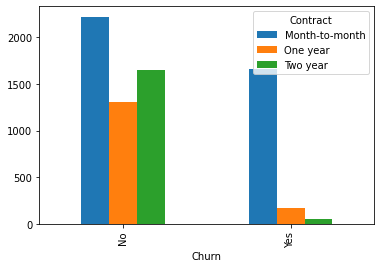

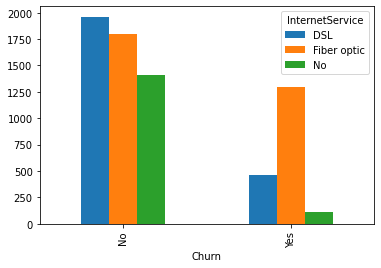

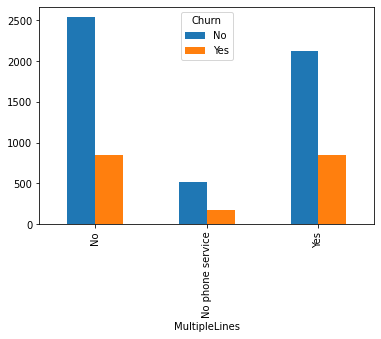

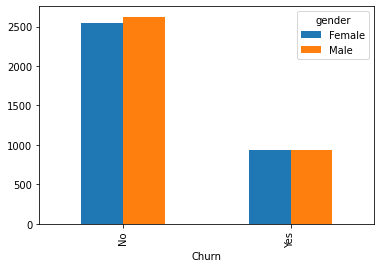

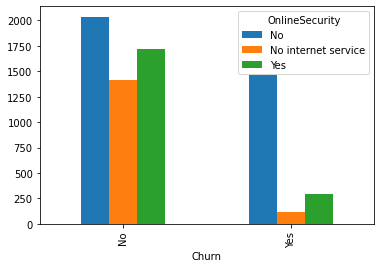

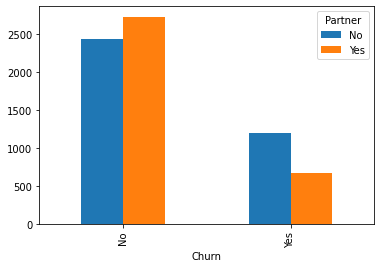

In [124]:

pd.crosstab(df['Churn'],df['Contract']).plot.bar()
pd.crosstab(df['Churn'],df['InternetService']).plot.bar()
pd.crosstab(df['MultipleLines'],df['Churn']).plot.bar()
pd.crosstab(df['Churn'],df['gender']).plot.bar()
pd.crosstab(df['Churn'],df['OnlineSecurity']).plot.bar()
pd.crosstab(df['Churn'],df['Partner']).plot.bar()


In [125]:
 cat=df.select_dtypes(exclude=['int32', 'int64','float64'])
num=df.select_dtypes(include=['int32', 'int64','float64'])

In [126]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat = cat.apply(LabelEncoder().fit_transform)
cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [128]:
df=pd.concat([num,cat],axis=1)

In [129]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


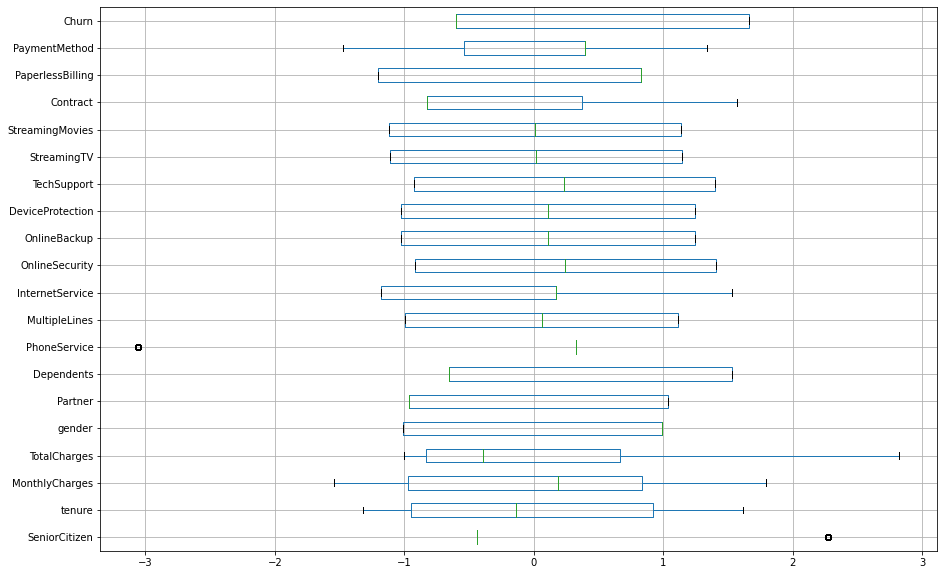

In [130]:
#outlier Check
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(df)
z=pd.DataFrame(scaler.transform(df),columns=df.columns)
z.boxplot(vert=False,figsize=(15,10))

In [131]:
df=pd.get_dummies(df, columns=['gender','Partner','Dependents','PhoneService','PaperlessBilling'],drop_first = True)

In [132]:
df.info()#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SeniorCitizen       7043 non-null   int64  
 1   tenure              7043 non-null   int64  
 2   MonthlyCharges      7043 non-null   float64
 3   TotalCharges        7032 non-null   float64
 4   MultipleLines       7043 non-null   int64  
 5   InternetService     7043 non-null   int64  
 6   OnlineSecurity      7043 non-null   int64  
 7   OnlineBackup        7043 non-null   int64  
 8   DeviceProtection    7043 non-null   int64  
 9   TechSupport         7043 non-null   int64  
 10  StreamingTV         7043 non-null   int64  
 11  StreamingMovies     7043 non-null   int64  
 12  Contract            7043 non-null   int64  
 13  PaymentMethod       7043 non-null   int64  
 14  Churn               7043 non-null   int64  
 15  gender_1            7043 non-null   uint8  
 16  Partne

In [133]:
a=df['TotalCharges'].median()
a

1397.475

In [134]:
df['TotalCharges'].fillna(1397.475,inplace=True)

In [135]:

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
X = df.drop(["Churn"], axis = 1)
y = df["Churn"]


In [137]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,gender_1,Partner_1,Dependents_1,PhoneService_1,PaperlessBilling_1
0,0,1,29.85,29.85,1,0,0,2,0,0,0,0,0,2,0,1,0,0,1
1,0,34,56.95,1889.50,0,0,2,0,2,0,0,0,1,3,1,0,0,1,0
2,0,2,53.85,108.15,0,0,2,2,0,0,0,0,0,3,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,2,0,2,2,0,0,1,0,1,0,0,0,0
4,0,2,70.70,151.65,0,1,0,0,0,0,0,0,0,2,0,0,0,1,1


In [138]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [139]:
#concat two dataframes for better visualization 
print(model.feature_importances_)

[0.02533333 0.15274087 0.1368206  0.15430681 0.02646955 0.03687649
 0.04702362 0.03482206 0.02947949 0.0400906  0.02280124 0.02292536
 0.07879133 0.06217539 0.03739782 0.03048605 0.0247105  0.00629395
 0.03045494]


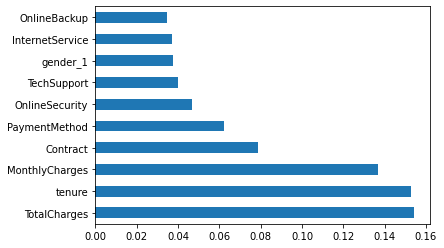

In [140]:
feat_importances= pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [141]:
X=X.drop(["StreamingTV","StreamingMovies","PhoneService_1","Partner_1","MultipleLines","InternetService","PaperlessBilling_1","OnlineBackup","Dependents_1","gender_1","SeniorCitizen"],axis=1)

In [142]:
X.head()

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity,DeviceProtection,TechSupport,Contract,PaymentMethod
0,1,29.85,29.85,0,0,0,0,2
1,34,56.95,1889.50,2,2,0,1,3
2,2,53.85,108.15,2,0,0,0,3
3,45,42.30,1840.75,2,2,2,1,0
4,2,70.70,151.65,0,0,0,0,2


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [144]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
print(X_train.shape)
print(y_train.shape)


(5634, 8)
(5634,)


In [145]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test=sc.transform(x_test)
print(x_test.shape)

(1409, 8)


In [161]:
#from sklearn.tree import DecisionTreeClassifier
#DTREE = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#DTREE.fit(X_train, y_train)
#y_pred=DTREE.predict(x_test)

In [168]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 500,random_state=0)
model=model.fit(X_train, y_train)
y_pred=model.predict(x_test)
print(y_test.shape)

(1409,)


In [169]:
#model=LogisticRegression()
#model.fit(X_train,y_train)
#y_pred=model.predict(x_test)
#print(y_test.shape)

In [170]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 78.35344215755855
Precision: 0.6310679611650486
Recall: 0.5051813471502591


In [149]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [150]:
# Initialising the ANN
model1=Sequential()
model1=Sequential()
model1.add(Dense(22,kernel_initializer='glorot_uniform',activation='relu',input_dim=8))

model1.add(Dense(22,kernel_initializer='glorot_uniform',activation='relu'))

model1.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))
# Adding dropout to prevent overfitting


In [151]:
model1.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])


In [152]:
model1.fit(X_train,y_train, batch_size=100,epochs=500)

Epoch 1/500
57/57 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.6596
Epoch 2/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.7767
Epoch 3/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.7854
Epoch 4/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.7870
Epoch 5/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.7897
Epoch 6/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.7925
Epoch 7/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.7953
Epoch 8/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.7955
Epoch 9/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.7977
Epoch 10/500
57/57 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.7959
Epoch 11/

In [153]:
y_pred=model1.predict(x_test,verbose=0)
y_pred=(y_pred>0.5)
cm=confusion_matrix(y_test,y_pred)
cm

array([[900, 123],
       [174, 212]])

In [154]:

from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred)
print("Accuracy",a*100)

Accuracy 78.92122072391767


In [100]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense,Dropout
def built_classifier():
  classifier=Sequential()
  classifier.add(Dense(22,kernel_initializer='glorot_uniform',activation='relu',input_dim=11))
  classifier.add(Dense(22,kernel_initializer='glorot_uniform',activation='relu'))
  classifier.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))
  classifier.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])
  
  return classifier

classifier=KerasClassifier(build_fn=built_classifier,batch_size=200,epochs=1000)
accuracies=cross_val_score(estimator = classifier, X = X_train, y = y_train ,cv=10,n_jobs=-1)

In [101]:
accuracies

array([0.78093308, 0.75456387, 0.77281946, 0.7667343 , 0.73630834,
       0.76876265, 0.78904665, 0.79310346, 0.78904665, 0.77079105])

In [102]:
mean=accuracies.mean()
mean

0.7722109496593476

In [171]:
model1.save("my_model1")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model1/assets


In [172]:
from keras.models import load_model 
model = load_model("my_model1") 

In [173]:
input=[[1,29.85,29.85,0,0,0,0,2]]

In [174]:
prediction = model.predict(input) 
print(prediction)

[[0.82023704]]
